In [1]:
# Dependencies
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from citipy import citipy
from urllib.error import HTTPError
from api_keys import api_key
api_key

'22646957123cb21bee91235dbc4a9f73'

,Latitude,Longitude,City Details
0,-45.605917,92.231868,"busselton,au"
1,-16.892544,-43.158408,"grao mogol,br"
2,-55.168248,5.690778,"cape town,za"
3,-69.476008,44.162029,"port alfred,za"
4,43.118228,101.865139,"hovd,mn"
5,-12.504495,-113.348375,"rikitea,pf"
6,26.680305,-82.707537,"englewood,us"
7,-62.066851,-178.728803,"vaini,to"
8,-38.285131,-36.214364,"laguna,br"
9,-45.538453,52.573726,"taolanaro,mg"


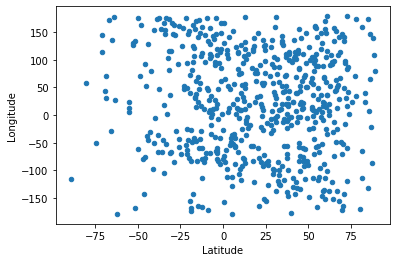

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Create latlng Dataframe to hold Lat, Long and City Details
latlngDf=pd.DataFrame()
latlngDf['Latitude']=lats
latlngDf['Longitude']=lngs
latlngDf['City Details']=""

# use iterrows to iterate through rows
for index, row in latlngDf.iterrows():
# citipy Looking up with coordinates : city = citipy.nearest_city(22.99, 120.21) , city.city_name , city.country_code  
    cityname = citipy.nearest_city(row['Latitude'], row['Longitude']).city_name
    countrycode = citipy.nearest_city(row['Latitude'], row['Longitude']).country_code
    # concat city name and country code as string and store in df
    latlngDf.loc[index,'City Details']=f"{cityname},{countrycode}"

# use drop_duplicates() method of Dataframe  to eliminate duplicate records for col(s) mentioned in subset.
latlngDf = latlngDf.drop_duplicates(subset=['City Details'],keep='first')
# reset index after duplicate records are dropped
latlngDf=latlngDf.reset_index(drop=True)
#latlngDf=latlngDf.head(15)

latlngDf.plot(kind='scatter',x='Latitude',y='Longitude')
latlngDf

In [3]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}
# Create a new data frame weatherDf to hold the information that we require from the API calls
cols=("City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed")
weatherDf=pd.DataFrame(columns=cols)
weatherDf['City']=latlngDf['City Details']
# create empty list to hold list of nested dicts returned from API calls
data=[]
# set counters to track record processing
counter=1
sets=1
# from API documentation to access multiple items at once :  keys = ["main.temp", "main.humidity", "wind.speed"], data(*keys)
# create a 'datareq' key list
datareq = ['main.temp_max', 'main.humidity', 'clouds.all', 'wind.speed', 'name', 'sys.country','coord.lon','coord.lat','dt']
print("Beginning Data Retrieval")   
print("-----------------------------")
# # use iterrows to iterate through rows
for index, row in weatherDf.iterrows():
    try:
        place=row['City']
        # API documentation , get data by city name and country code , data = owm.get_current("Kassel,DE")
        data=owm.get_current(place, **settings)
        print(f"Processing Record {counter} of Set {sets} | {place}")
        # access multiple items at once using keys and store in a list
        info=data(*datareq)
        # Update weatherDf dataframe with values obtained
        weatherDf.loc[index, 'Cloudiness'] = info[2]
        weatherDf.loc[index, 'City'] = info[4]
        weatherDf.at[index,'Country'] = info[5]
        weatherDf.at[index,'Date'] = str(info[8])
        weatherDf.at[index,'Humidity'] = int(info[1])
        weatherDf.at[index,'Lat'] = info[7]
        weatherDf.at[index,'Lng'] = info[6]
        weatherDf.at[index,'Max Temp'] = info[0]
        weatherDf.at[index,'Wind Speed'] = info[3]
        # update counter to track record processing , increment set and reset counter after 50 records are processed
        counter=counter+1
        if counter > 50 :
            counter=1
            sets=sets+1
    except (HTTPError) :
        print(f"({place}) City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")
# Drop rows where value is Nan
weatherDf=weatherDf.dropna()
# set numeric cols to numeric using apply(pd.to_numeric)
weatherDf[["Cloudiness", "Humidity","Lat","Lng","Max Temp","Wind Speed"]] = weatherDf[["Cloudiness", "Humidity","Lat","Lng","Max Temp","Wind Speed"]].apply(pd.to_numeric)



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puerto ayora,ec
Processing Record 2 of Set 1 | destin,us
Processing Record 3 of Set 1 | kampong chhnang,kh
Processing Record 4 of Set 1 | georgetown,sh
(taolanaro,mg) City not found. Skipping...
Processing Record 5 of Set 1 | qaqortoq,gl
Processing Record 6 of Set 1 | busselton,au
Processing Record 7 of Set 1 | nshamba,tz
(tubruq,ly) City not found. Skipping...
Processing Record 8 of Set 1 | san buenaventura,mx
Processing Record 9 of Set 1 | castro,cl
Processing Record 10 of Set 1 | whitehorse,ca
(mataura,pf) City not found. Skipping...
Processing Record 11 of Set 1 | tasiilaq,gl
Processing Record 12 of Set 1 | arraial do cabo,br
Processing Record 13 of Set 1 | pozo colorado,py
Processing Record 14 of Set 1 | bronnoysund,no
Processing Record 15 of Set 1 | dahegam,in
Processing Record 16 of Set 1 | pisco,pe
Processing Record 17 of Set 1 | rikitea,pf
Processing Record 18 of Set 1 | cacheu,gw
Processing 

Processing Record 14 of Set 4 | ilinskiy,ru
Processing Record 15 of Set 4 | havelock,us
Processing Record 16 of Set 4 | carbonia,it
Processing Record 17 of Set 4 | weiser,us
Processing Record 18 of Set 4 | hasaki,jp
Processing Record 19 of Set 4 | pevek,ru
Processing Record 20 of Set 4 | lensk,ru
Processing Record 21 of Set 4 | kargopol,ru
Processing Record 22 of Set 4 | san javier,bo
(yuzhno-yeniseyskiy,ru) City not found. Skipping...
(avera,pf) City not found. Skipping...
Processing Record 23 of Set 4 | macas,ec
Processing Record 24 of Set 4 | labuhan,id
(airai,pw) City not found. Skipping...
Processing Record 25 of Set 4 | cidreira,br
Processing Record 26 of Set 4 | ribeira grande,pt
Processing Record 27 of Set 4 | bandarbeyla,so
(burica,pa) City not found. Skipping...
Processing Record 28 of Set 4 | mar del plata,ar
Processing Record 29 of Set 4 | paonta sahib,in
Processing Record 30 of Set 4 | codajas,br
Processing Record 31 of Set 4 | comodoro rivadavia,ar
(tumannyy,ru) City not 

Processing Record 21 of Set 7 | fortuna,us
Processing Record 22 of Set 7 | itarema,br
Processing Record 23 of Set 7 | black river,jm
Processing Record 24 of Set 7 | henties bay,na
Processing Record 25 of Set 7 | puerto escondido,mx
Processing Record 26 of Set 7 | port moresby,pg
Processing Record 27 of Set 7 | villa alemana,cl
Processing Record 28 of Set 7 | caravelas,br
(tabiauea,ki) City not found. Skipping...
Processing Record 29 of Set 7 | trinidad,uy
Processing Record 30 of Set 7 | rorvik,no
Processing Record 31 of Set 7 | shihezi,cn
Processing Record 32 of Set 7 | touros,br
Processing Record 33 of Set 7 | sorland,no
Processing Record 34 of Set 7 | vardo,no
(gilgil,ke) City not found. Skipping...
Processing Record 35 of Set 7 | havre-saint-pierre,ca
Processing Record 36 of Set 7 | mandera,ke
Processing Record 37 of Set 7 | rio verde de mato grosso,br
(ayan,ru) City not found. Skipping...
Processing Record 38 of Set 7 | northam,au
Processing Record 39 of Set 7 | kalmunai,lk
Process

Processing Record 35 of Set 10 | emilio carranza,mx
(rungata,ki) City not found. Skipping...
(yialos,gr) City not found. Skipping...
Processing Record 36 of Set 10 | jiuquan,cn
Processing Record 37 of Set 10 | umm lajj,sa
Processing Record 38 of Set 10 | tawau,my
Processing Record 39 of Set 10 | luanda,ao
Processing Record 40 of Set 10 | morehead,pg
Processing Record 41 of Set 10 | solnechnyy,ru
Processing Record 42 of Set 10 | huntsville,ca
Processing Record 43 of Set 10 | motril,es
Processing Record 44 of Set 10 | arkhangelsk,ru
Processing Record 45 of Set 10 | dembi dolo,et
Processing Record 46 of Set 10 | nago,jp
Processing Record 47 of Set 10 | rio bueno,cl
Processing Record 48 of Set 10 | canon city,us
Processing Record 49 of Set 10 | panjab,af
(eskasem,af) City not found. Skipping...
Processing Record 50 of Set 10 | bambous virieux,mu
Processing Record 1 of Set 11 | gonen,tr
Processing Record 2 of Set 11 | guadalupe,co
Processing Record 3 of Set 11 | rocha,uy
Processing Record 4

In [4]:
# Display the WeatherDf dataframe
weatherDf=weatherDf.reset_index(drop=True)
weatherDf

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,20,EC,1567536176,65,-0.74,-90.35,26.00,9.30
1,Destin,1,US,1567536173,46,30.39,-86.50,35.00,4.60
2,Kampong Chhnang,100,KH,1567536383,80,12.25,104.67,25.97,5.77
3,Georgetown,100,SH,1567536383,80,-7.93,-14.42,22.97,7.82
4,Qaqortoq,75,GL,1567536317,76,60.72,-46.03,10.00,1.00
5,Busselton,17,AU,1567536383,55,-33.64,115.35,11.11,13.58
6,Nshamba,99,TZ,1567536383,52,-1.80,31.55,23.27,0.94
7,San Buenaventura,75,MX,1567536384,35,27.06,-101.55,32.00,4.10
8,Castro,0,CL,1567536384,61,-42.48,-73.76,10.00,4.10
9,Whitehorse,20,CA,1567536354,54,60.72,-135.06,14.00,4.10


In [5]:
# Display the WeatherDf dataframe count and write to csv
weatherDf.to_csv('out.csv')
weatherDf.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [6]:
#Pick sample size of 600 without replacement based on the original dataframe 
#( only pick with replacement if the dataframe size is less than sample size)

if weatherDf['City'].count() > 600 :
    try:
        weatherDf= weatherDf.sample(600)
        weatherDf
        print ("Sample data set without replacement")
    except (ValueError):
        print ("Sample data set with replacement")
        weatherDf= weatherDf.sample(600,replace=True)
    # Reset index after sampling
        weatherDf=weatherDf.reset_index(drop=True)
#sampleW_Df
else:
    print ("Full data set")
weatherDf

Full data set


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Puerto Ayora,20,EC,1567536176,65,-0.74,-90.35,26.00,9.30
1,Destin,1,US,1567536173,46,30.39,-86.50,35.00,4.60
2,Kampong Chhnang,100,KH,1567536383,80,12.25,104.67,25.97,5.77
3,Georgetown,100,SH,1567536383,80,-7.93,-14.42,22.97,7.82
4,Qaqortoq,75,GL,1567536317,76,60.72,-46.03,10.00,1.00
5,Busselton,17,AU,1567536383,55,-33.64,115.35,11.11,13.58
6,Nshamba,99,TZ,1567536383,52,-1.80,31.55,23.27,0.94
7,San Buenaventura,75,MX,1567536384,35,27.06,-101.55,32.00,4.10
8,Castro,0,CL,1567536384,61,-42.48,-73.76,10.00,4.10
9,Whitehorse,20,CA,1567536354,54,60.72,-135.06,14.00,4.10


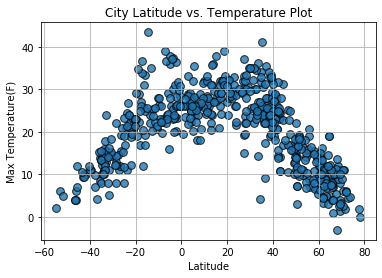

In [7]:
#Lat vs Max Temp

weatherDf.plot(kind='scatter',x='Lat',y='Max Temp',s=60,edgecolor='black',alpha=0.8)

plt.title("City Latitude vs. Temperature Plot")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('City Latitude vs.Temperature Plot.png')

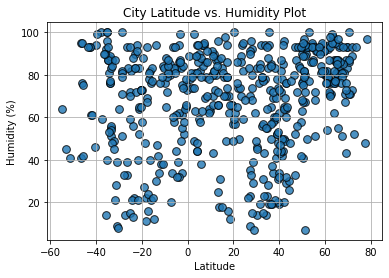

In [8]:
#Lat vs Humidity plot
weatherDf.plot(kind='scatter',x='Lat',y='Humidity',s=60,edgecolor='black',alpha=0.8)

plt.title("City Latitude vs. Humidity Plot")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#plt.xlim(-60,80)
plt.grid()
plt.savefig('City Latitude vs.Humidity Plot.png')

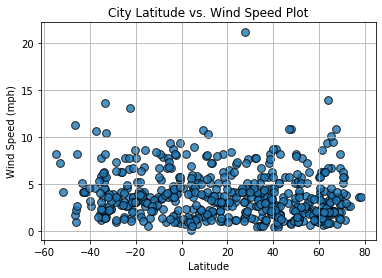

In [9]:
#Latitude vs. Wind Speed Plot
weatherDf.plot(kind='scatter',x='Lat',y='Wind Speed',s=60,edgecolor='black',alpha=0.8)
plt.title("City Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('City Latitude vs.Wind Speed Plot.png')

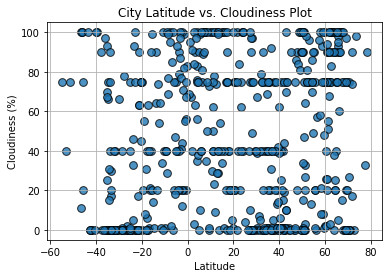

In [10]:
#Latitude vs. Cloudiness Plot
weatherDf.plot(kind='scatter',x='Lat',y='Cloudiness',s=60,edgecolor='black',alpha=0.8)
plt.title("City Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('City Latitude vs.Cloudiness Plot.png')